**Chris DeGrendele**

This is a notebook where I go through the following course, implementing some ideas and lessons.
https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=1

---

# Univariate Linear Regression
Assume a linear hypothesis:
$h_{\theta}(x) = \theta_0 + \theta_1x$

Minimize:
J$(\theta_0, \theta_1)$ = $\frac{1}{2N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2$
 
 $\implies$ This is out **cost** function

In [132]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 5, 7, 6, 8, 9 ,12])

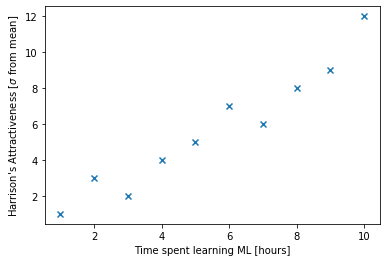

In [133]:
plt.scatter(x,y, marker='x')
plt.xlabel("Time spent learning ML [hours]")
plt.ylabel("Harrison's Attractiveness $[\sigma$ from mean]");

We will solve this using **batch gradient descent**

$$\theta_j =\theta_j -\alpha* \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1) \text{ for } j = 0,1$$

where $$\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{1}{N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)$$

$$\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{1}{N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)*x^{(i)}$$

In [134]:
def H(x, θ_0, θ_1):
    return θ_0 + x*θ_1

def cost(x,y,θ_0,θ_1):
    sum = 0
    for i in range(len(x)):
        sum += ( H(x[i], θ_0, θ_1) - y[i] )**2
    return 1/(2*len(x)) * sum
    

def gradient_descent(x,y,α,tol):
    assert len(x) == len(y)
    N = len(x) 
    
    θ_0, θ_1 = random(), random()
    
    while cost(x,y,θ_0,θ_1) > tol:
        print("Cost: ",cost(x,y,θ_0,θ_1))
        temp0, temp1 = 0,0
        for i in range(N):
            temp0 += H(x[i], θ_0, θ_1) - y[i]
            temp1 += (H(x[i], θ_0, θ_1) - y[i])*x[i]

        θ_0 = θ_0 - α*temp0/N
        θ_1 =  θ_1 - α*temp1/N



    return θ_0, θ_1

In [137]:
θ_0, θ_1 = gradient_descent(x,y,.01,0.5)

Cost:  4.628701203452846
Cost:  1.9527171386248072
Cost:  0.966322265056291
Cost:  0.6026599491942967


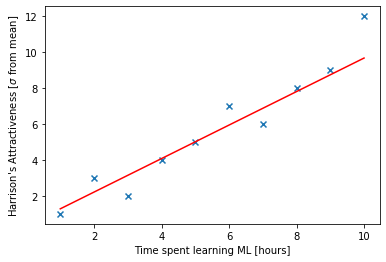

In [140]:
plt.scatter(x,y, marker='x')
plt.plot(x, θ_0+ x*θ_1, color="red")
plt.xlabel("Time spent learning ML [hours]")
plt.ylabel("Harrison's Attractiveness $[\sigma$ from mean]");